In [2]:
import pandas as pd

In [6]:
# load the datasets
train_data = pd.read_csv('C:/Users/SEI-LP95/Downloads/titanic/train.csv')
test_data = pd.read_csv('C:/Users/SEI-LP95/Downloads/titanic/test.csv')

# HANDLING MISSING VALUE

In [7]:
# check the mising values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing values or drop rows/columns with missing values
# Fill missing ages with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)  

In [9]:
# Fill missing embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)  

In [10]:
# Drop Cabin as it has too many missing values
train_data.drop(columns=['Cabin'], inplace=True)  

In [11]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# CONVERT CATOGORCAL DATA

In [12]:
# convert catogorical variable into numericals
train_data['Sex'] =train_data['Sex'].map({'male':0,'female':1})
train_data['Embarked'] =train_data['Embarked'].map({'S':0,'C':1,'Q':2})

In [13]:
# One-hot encode other categorical features if necessary
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)

# Exploratory Data Analysis (EDA)


In [14]:
# get statistical summmary
print(train_data.describe())

       PassengerId    Survived         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    0.352413   29.361582    0.523008   
std     257.353842    0.486592    0.477990   13.019697    1.102743   
min       1.000000    0.000000    0.000000    0.420000    0.000000   
25%     223.500000    0.000000    0.000000   22.000000    0.000000   
50%     446.000000    0.000000    0.000000   28.000000    0.000000   
75%     668.500000    1.000000    1.000000   35.000000    1.000000   
max     891.000000    1.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked    Pclass_2    Pclass_3  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.361392    0.206510    0.551066  
std      0.806057   49.693429    0.635673    0.405028    0.497665  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    7.910400

# Visualize Distributions 

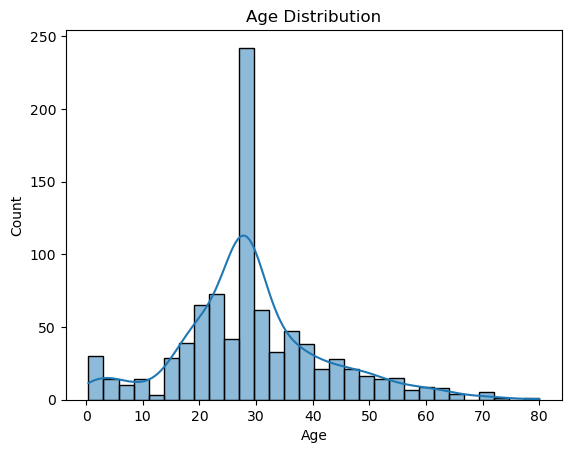

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot distribution of age
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

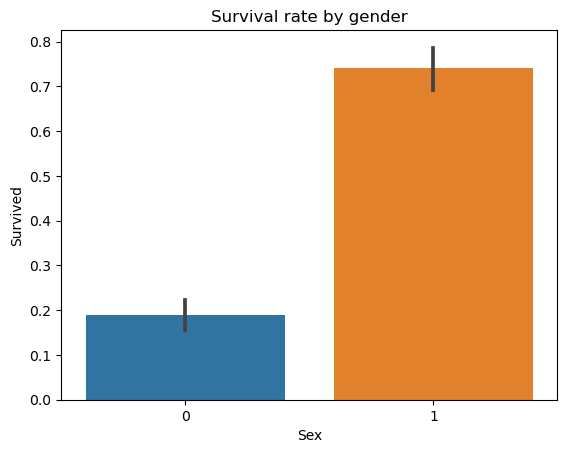

In [16]:
# Plot survival rate by gender
sns.barplot(x='Sex',y = 'Survived',data =train_data)
plt.title('Survival rate by gender')
plt.show()

# Explore Relationships Between Variables

In [20]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Pclass_2', 'Pclass_3'],
      dtype='object')


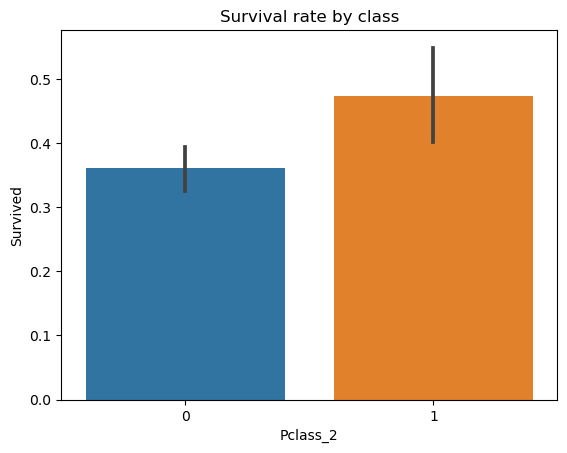

In [21]:
# survival rate by class
sns.barplot(x='Pclass_2',y = 'Survived',data =train_data)
plt.title('Survival rate by class')
plt.show()

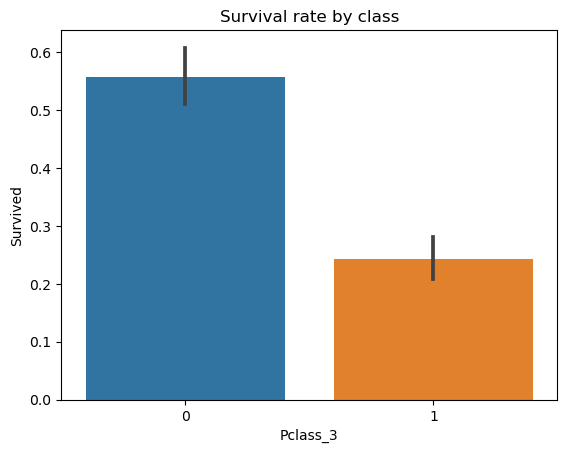

In [22]:
# survival rate by class
sns.barplot(x='Pclass_3',y = 'Survived',data =train_data)
plt.title('Survival rate by class')
plt.show()

C:\Users\SEI-LP95\AppData\Local\Temp\ipykernel_15396\3621135096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


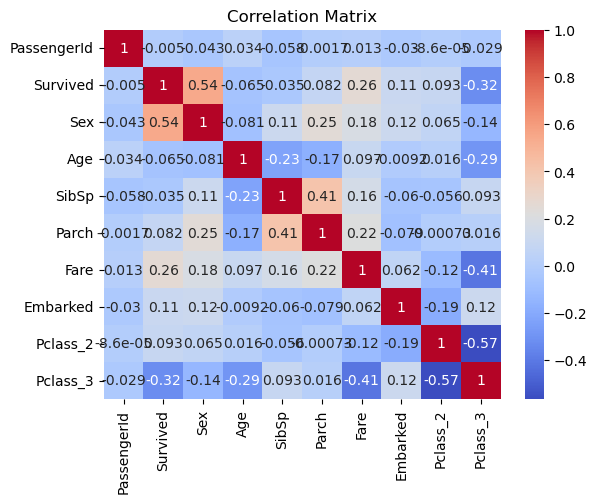

In [23]:
# Correlation matrix
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify Patterns and Trends

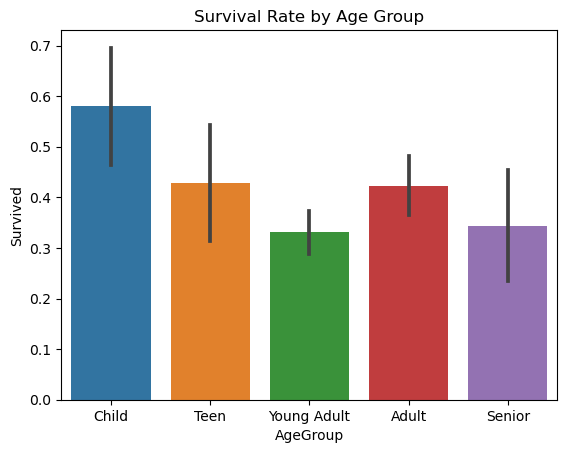

In [24]:
# Survival rate by age group
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.show()

In [25]:
# Save cleaned dataset
train_data.to_csv('cleaned_train_data.csv', index=False)